In [10]:
%matplotlib inline

import numpy as np # grey images are stored in memory as 2D arrays, color images as 3D arrays
import cv2 as cv2 # opencv computer vision library
from skimage import io # for io.imread
from matplotlib import pyplot as plt # ploting
from matplotlib import colors # ploting

import os

# interactive notebook widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import copy
import random

import tqdm

In [76]:
#import d'une vidéo (Pour le projet il faudra faire en sorte que la webcam marche)
cam=cv2.VideoCapture('IMG_9190.mp4')

## 1) Lecture d'une vidéo et découpage de ses différentes images : 

In [ ]:
try:  
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')
  # if not created then raise error
except OSError:
    print ('Error: Creating directory of data')

currentframe = 0 #frame
video=[]
  
while(True):   
    # reading from frame
    ret,frame = cam.read() 
    #ret gets true if another image after, false if last image
    #frame is the corresponding image
    video.append(frame)
    
    if ret:
        # if video is still left continue creating images
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  # Release all space and windows once done
cam.release()
cv2.destroyAllWindows()
video=np.array(video)

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg
Creating..../data/frame17.jpg
Creating..../data/frame18.jpg
Creating..../data/frame19.jpg
Creating..../data/frame20.jpg
Creating..../data/frame21.jpg
Creating..../data/frame22.jpg
Creating..../data/frame23.jpg
Creating..../data/frame24.jpg
Creating..../data/frame25.jpg
Creating..../data/frame26.jpg
Creating..../data/frame27.jpg
Creating..../data/frame28.jpg
Creating..../data/frame29.jpg
Creating..../data/frame30.jpg
Creating..../data/frame31.jpg
Creating..../data/frame32.jpg
Creating..../data/fr

/Users/mathieu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


### Change of images channel 

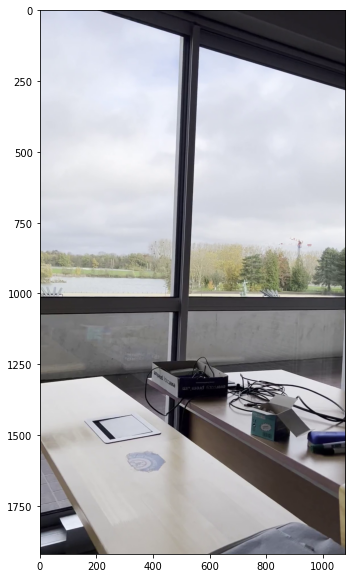

In [ ]:
img=copy.deepcopy(video[1])

#they interchanged R and B so:

out=np.zeros(video[0].shape)

out[:,:,0]=copy.deepcopy(img[:,:,2]) #--->Here
out[:,:,1]=copy.deepcopy(img[:,:,1])
out[:,:,2]=copy.deepcopy(img[:,:,0]) #--->Here
out=out.astype(int) #IMPORTANT

'''Trying to show one frame of the video'''
plt.figure(figsize=(10,10))
plt.imshow(out)

#need to do it on all the images of the video

# I.                                   SEGMENTATION PART 

##  I.I Our own growing region algo (later maybe)

In [ ]:
#find a "green enough" spot

img=video[50] #we select one image 
i,j=0,0
g_point=img[i,j,:]
print(g_point, i, j)
while (g_point[1]<100) or (g_point[0]>100) or (g_point[2]>100): #need a better selection criteria! 
#(check the color of the green blanket we will use)

    i=random.randint(0, img.shape[0]-1)
    j=random.randint(0, img.shape[1]-1)
    g_point=img[i,j,:]
    
print(g_point, i, j)

[102 114 124] 0 0
[ 95 104  92] 990 373


In [ ]:
#growing region
#i,j point of interest (which starts the growing region)
#T the threshold

def GR(img, i, j, T):
    
    (I,J,colors)=(img.shape)
    new_region=[[i,j]]
    treated_region=[]
    total_region=[[i,j]]
    
    mu_R, mu_G, mu_B=img[i,j,0], img[i,j,1], img[i,j,2]
    neighb=[-1,0,1]
    
    while new_region!=[]:
        #print("new", new_region)
        #print("treated", treated_region)
        #print("total", total_region)
        print(len(total_region)/(I*J))
 
        #everytime reevaluate mu of total_R
        mu_R, mu_G, mu_B=0,0,0
        for k in range(len(total_region)):
            pt=total_region[k]
            mu_R+=img[pt[0], pt[1], 0]
            mu_G+=img[pt[0], pt[1], 1]
            mu_B+=img[pt[0], pt[1], 2]
        mu_R/=len(total_region)
        mu_G/=len(total_region)
        mu_B/=len(total_region)
        
        #can also compute sigma (if we decide to use it for the thresholding criteria)
        
        R=copy.deepcopy(new_region)
        for pt in R: #treat all the points newly added to the region
            i,j=pt[0], pt[1]
            for add_i in neighb:
                for add_j in neighb:
                    newi=i+add_i
                    newj=j+add_j
                    if newi!=i or newj!=j:
                        if (newi>=0) and (newj>=0) and (newi<I) and (newj<J) and ([newi, newj] not in total_region):
                            if np.abs(img[newi,newj,0]-mu_R)<T and np.abs(img[newi,newj,1]-mu_G)<T and np.abs(img[newi,newj,2]-mu_B)<T:
                                new_region.append([newi,newj])
                                total_region.append([newi, newj])

            treated_region.append(pt)
            new_region.remove(pt)
            #print(treated_region)
            
    return treated_region

In [ ]:
test2=np.zeros((5,5,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


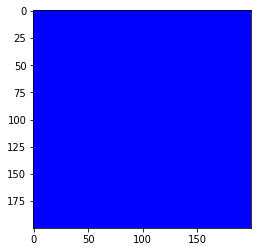

In [ ]:
matrix_test=np.zeros((200,200,3))
for i in range(200):
    for j in range(200):
        for k in range(3):
            if k==2:
                matrix_test[i,j,k]=100
                
plt.imshow(matrix_test)

In [ ]:
new_region=GR(out, 1750,400 , 10)
new_region

In [ ]:
def remover(image,R):
    img=copy.deepcopy(image)
    for pt in range(len(R)):
        for color in range(3):
            img[R[pt][0], R[pt][1], color]=0
    return img

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(remover(matrix_test, new_region))

## I.II Using libraries

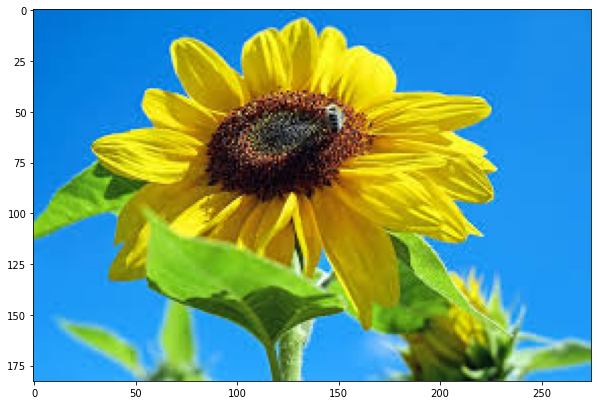

In [ ]:
img=cv2.imread('Plante.jpg')

#they interchanged R and B so:

fleur=np.zeros(img.shape)

fleur[:,:,0]=copy.deepcopy(img[:,:,2]) #--->Here
fleur[:,:,1]=copy.deepcopy(img[:,:,1])
fleur[:,:,2]=copy.deepcopy(img[:,:,0]) #--->Here
fleur=fleur.astype(int) #IMPORTANT

'''Trying to show one frame of the video'''
plt.figure(figsize=(10,10))
plt.imshow(fleur)

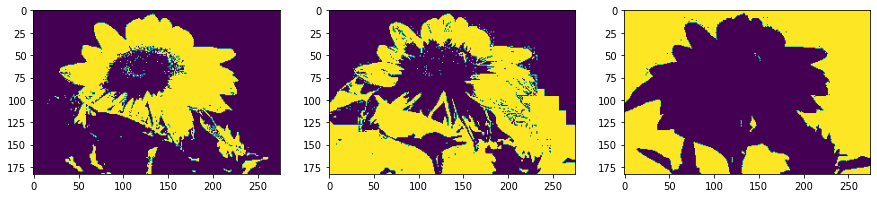

In [ ]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
 
# Sample Image of scikit-image package
img_R=fleur[:,:,0]
img_G=fleur[:,:,1]
img_B=fleur[:,:,2]

segm_R=(img_R > 150)*1
segm_G=(img_G > 150)*1
segm_B=(img_B > 200)*1 #above threshold ==> 1 and below threshold ==> 0

fig=plt.figure(figsize=(15, 15))
rows=1
columns=3

fig.add_subplot(rows, columns, 1)
plt.imshow(segm_R)
fig.add_subplot(rows, columns, 2)
plt.imshow(segm_G)
fig.add_subplot(rows, columns, 3)
plt.imshow(segm_B)


In [ ]:
'''
cam=cv2.VideoCapture(1)
window="webcam"
Width= int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
Height=int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
cv2.namedWindow(window,cv2.WND_PROP_FULLSCREEN)

while cam.isOpened(): 
    
    ret,img=cam.read()
    if ret: 
        cv2.imshow(window,img)
        #il faut introduire la fonction ici 
        if cv2.waitKey(25) & 0xFF==ord('q'): 
            break   
'''

Récap : ce qu'on a fait 
- On est capable de trouver la zone verte dans l'image.
- On doit dire :"fais disparaitre cette zone verte et reconstruit le background de l'image" en lui donnant une image avec une personne entouré de la cape. 
- Algorithme Gan : on va utiliser le vanilla Gan, qui est le modèle de base et qui marche plutot bien. 

On va donner au discriminateur des images réèls ( banque d'image crée )
et au générateur on va lui donner nos images "troué" pour qu'ils essaient de les reconstruire

https://debuggercafe.com/vanilla-gan-pytorch/

# II.Gan creation (background reconstruction)

In [ ]:
#pip install torchvision

## II.I Dataset creation

### II.I.I Google scrapping

In [ ]:
import os
import selenium
from selenium import webdriver 
import base64
import time
import urllib.request

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time


keys=["living room","salon","kitchen background","cuisine","salle à manger","pièce de vie","Intérieur maison","intérieur salon"
         ,"chambre à coucher","bedroom","house corridor","couloir de maison","house garden"
         ,"appartement","appartment","intérieur appartement","inspiration salon"
         ,"chambre parentale","canapé inspiration","house groundfloor","Dining room"
         ,"Bathroom","salle de bain","salle d'eau","garage","décoration d'intérieur","sofa inspiration"
         ,"closet","armoire","décoration salon"
         ,"décoration maison","art de la table","scène familiale maison", "background appartement","background living room"
         ,"décoration chambre","intérieur maison","fond appartement","rooms","kids room","sofa in the living room", "canapé appartement"
         ,"idée d'intérieur appartement","living room interior","inspiration bathroom","meuble TV","image canapé salon","photos salle à manger"
         ,"meuble maison en situation","maison du monde inspiration","ikea inspiration","la redoute intérieur", "h & m house inspiration"
         ,"coussin canapé","living room background","idée intérieur maison","modern living room","décoration intérieur moderne"]

for i in range(len(keys)):
    #print("lets start with the key : ", keys[i])
    driver = webdriver.Chrome('C:/Users/hanna/Desktop/UNIVERSITE/M1 polytechnique/INF573_Image analysis and computer vision/Google-Image-Scraper-master/Google-Image-Scraper-master\webdriver\chromedriver.exe')
    driver.get('https://www.google.com/') # On se rend sur la page de google

    #My computer is asking for a permission so i need to accept it. 
    driver.find_element('xpath','//*[@id="L2AGLb"]/div').click()

    box = driver.find_element('xpath','/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input') #code html de la barre de recherche 
    box.send_keys(keys[i]) #Le key word a chercher sur la barre de recherche
    box.send_keys(Keys.ENTER) #Appuyer sur le bouton entrer de google

    driver.find_element('xpath','//*[@id="hdtb-msb"]/div[1]/div/div[2]/a').click() #On veut aller sur le google image donc on récupère la partie html du clik 


    #Will keep scrolling down the webpage until it cannot scroll no more
    last_height = driver.execute_script('return document.body.scrollHeight')
    while True:
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
        time.sleep(2)
        new_height = driver.execute_script('return document.body.scrollHeight')
        try:
            driver.find_element('xpath','//*[@id="islmp"]/div/div/div/div/div[5]/input').click()
            time.sleep(3)
        except:
            pass
        if new_height == last_height:
            break
        last_height = new_height

    #we need to download images with a screenshot so we create a loop with the html code of google images. 
    # //*[@id="islrg"]/div[1]/div[1]/a[1]/div[1]/img correspond to the first image, we only need to iterate with div[i]

    for j in range(1, 1000): #Here we want to download only 10 images for example
        try:
            driver.find_element('xpath','//*[@id="islrg"]/div[1]/div['+str(j)+']/a[1]/div[1]/img').screenshot('C:/Users/hanna/Desktop/UNIVERSITE/M1 polytechnique/INF573_Image analysis and computer vision/Project/ComputerVision_Project/Google_Scrapping/'+keys[i]+str(j)+'.png')
            #print(keys[i]+str(j))
            #print("ok")
        except:
            pass

    driver.close()

### II.I.II dataset importation

In [11]:
#Step 1: Importer le data set et le transformer en RGB 
from os import listdir

In [46]:
import PIL
from tqdm import tqdm

def load_images(directory,n): 
    images=[]
    i=0
    #print(directory)
    skipped=0
    for file in tqdm(listdir(directory)):
        filename=directory+"/"+file
        #print(filename)
#         image=cv2.imread(filename) #We read every images on the folder
        image = PIL.Image.open(filename)
        #plt.imshow(image)
        try:
#             image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #We transform it into BGR to RGB
            #plt.imshow(image)
            image=np.asarray(image) #convert the input to an array
            images.append(image)
        except:
            skipped += 1
            print(f"[EXCEPTION #{skipped}]Image of name {file} triggered an exception. It was skipped")
        
        if i>n: 
            break 
    return np.asarray(images,dtype=object)

In [ ]:
# Checking id the GPu is available
#torch.cuda.is_available()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# n is the number of images that i want to take in the dataset
from tqdm import tqdm
from time import sleep
images=load_images(dataroot,19000)
print(images.shape)

100%|██████████| 19081/19081 [03:34<00:00, 89.12it/s] 


(19081,)


In [51]:
images[0].shape

(180, 258, 4)

<function matplotlib.pyplot.show(close=None, block=None)>

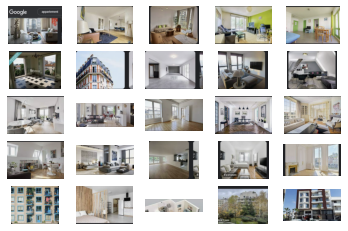

In [52]:
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(images[i])
plt.show

### II.I.III dataset redimension

In [54]:
#Redimension the images=[]
for image in images:
  (I,J,K)=image.shape
  if I>64:
    if J>64:
      mid_I=math.floor(I/2)
      mid_J=math.floor(J/2)
      new_data.append(image[mid_I-32:mid_I+32, mid_J-32:mid_J+32, :])
      

<function matplotlib.pyplot.show(close=None, block=None)>

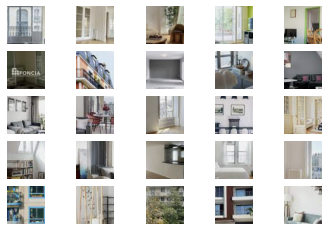

In [56]:
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(new_data[i])
plt.show

In [86]:
print(np.array(new_data).shape)

(18840, 64, 64, 4)


### II.I.IV dataset hole creation

In [89]:
#We need to insert the hole into the 19 000 images
test=np.array(new_data)[0:3,:,:]
print(test.shape)

(3, 64, 64, 4)


In [ ]:
# il faut que la région soit un bloob. Regarder les algorithmes de segmpentation pour arriver à mettre en noir une région.

(64, 64, 4)
dimension of the image (64, 64)
Point d'origine :  (47, 16)
on va jusqua 62 45
(64, 64, 4)
dimension of the image (64, 64)
Point d'origine :  (1, 7)
on va jusqua 32 14
(64, 64, 4)
dimension of the image (64, 64)
Point d'origine :  (29, 51)
on va jusqua 46 64


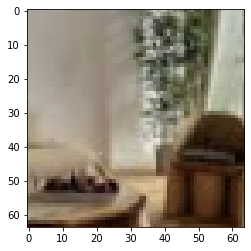

In [99]:
for it in range(test.shape[0]):
    print(test[it].shape)
    plt.imshow(test[it])
    l,h,c=test[it].shape #on récupère les dimensions de l'image en question 
    print("dimension of the image",(l,h))
    #selection of a randomly point g
    i=random.randint(0, test[it].shape[0])
    j=random.randint(0, test[it].shape[1])
    g_point=test[it][i,j,:]
    print("Point d'origine : ",(i,j))
    
    test[it][i,j,:]=np.array([0,0,0,0]) #On met le pixel d'orine à noir
    
    Random_it_x=random.randint(i,test[it].shape[0]) #On va aller de notre point jusqu'au pixel de coordonés Random_it_x
    Random_it_y=random.randint(j,test[it].shape[1]) # #On va aller de notre point jusqu'au pixel de coordonés Random_it_y
    
    print("on va jusqua",Random_it_x,Random_it_y)
    
    for x in range (i,Random_it_x): 
        for y in range (j,Random_it_y): 
            test[it][i,j,:]=np.array([0,0,0,0]) #on met le pixel de la zone en noir
    plt.imshow(test[it])

## II.II Gan implementation

In [77]:
# Root directory for dataset
'''In mathieu mac, decomment: 
dataroot = "/content/drive/MyDrive/DATASET_VISION/Google_Scrapping"
In hanna google collab decomment : 
dataroot="/content/drive/MyDrive/Google_Scrapping"
In jupyter decomment : '''

dataroot="C:/Users/hanna/Desktop/UNIVERSITE/M1 polytechnique/INF573_Image analysis and computer vision/Project/ComputerVision_Project/Google_Scrapping"
# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 15

# Number of training epochs
num_epochs = 20

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 0

### Configuration of variables 

- The number of epochs: each training process contains a fixed number of iterations through the entire training set, the number of epochs.

- The noise dimension: recall that the Generator will be fed a variable that serves as a sample from a multidimensional latent distribution. These are difficult words to say that we sample from a landscape that will eventually take a shape so that good examples are produced by the Generator. The dimensionality of this landscape and hence the vectors sampled from it will be defined by NOISE_DIMENSION.

- The batch size: within an epoch, we feed forward the data through the network in batches - i.e., not all in once. The why is simple - because it would not fit in memory otherwise. We set the batch size to 128 samples, but this can be higher, depending on the hardware on your system.

- Training on GPU, yes or no: depending on the availability of a GPU, you can choose to use it for training - otherwise your CUP will be used.

- A unique run identifier: related to housekeeping. You will see that during the training process, intermediate models and images will be stored on disk so that you can keep track of training progress. A folder with a unique identifier will be created for this purpose; hence the UNIQUE_RUN_ID.

- Print stats after n-th batch: after feeding forward minibatches through the network, statistics will be printed after every n-th batch. Currently, we set it to 50.

- The optimizer learning rate and optimizer betas. The optimizer for the Generator and Discriminator will be initialized with a learning rate and Beta values. We set them to values that are deemed to produce acceptable results given previous research.

- The output shape of the generator output will be used to initialize the last layer of the Generator and the first layer of the Discriminator. It must be a multiplication of all shape dimensions of an individual image. In the exemple case, the MNIST dataset has 28x28x1 images.

In [13]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import math

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


### Creating the dataset with a black hole 

# **Documentation**

torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros', device=None, dtype=None)


In [65]:
#device = "cuda"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataloader = torch.utils.data.DataLoader(new_data, batch_size=batch_size, shuffle=True, num_workers=workers)

In [66]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [59]:
# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64
# Size of z latent vector (i.e. size of generator input)
nz = 100 
# Size of feature maps in generator (number of "colors")
ngf=64
# Number of channels in the training images. For color images this is 3
nc = 3

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf*8, 4, 1, 0, bias=False),
            #in_channels=the number of theoretical colors (aka K in (I,J,K) shape of the image)
            #Thus the layer always first takes a 1*1 images and you vary this K
            nn.BatchNorm2d(ngf*8),
            nn.ReLU(True),

            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf*8, ngf*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*4),
            nn.ReLU(True),

            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [60]:
netG = Generator(ngpu).to(device)
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
netG.apply(weights_init)
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [61]:
# Size of feature maps in discriminator
ndf = 64

class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [62]:
netD = Discriminator(ngpu).to(device)
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [63]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [74]:

netG.load_state_dict(torch.load("950generator.weights"))
netG.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

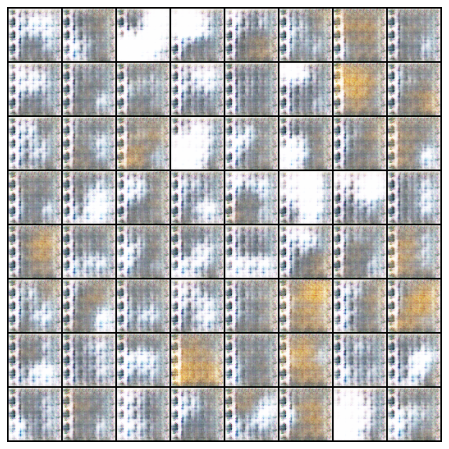

In [75]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

In [69]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in tqdm(enumerate(dataloader, 0)):
        # print(data.shape)
        data = data.transpose(1,3)
        data = data[:, :3, :, :]

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data.to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        # print(real_cpu.float().shape)
        output = netD(real_cpu.float()).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
            torch.save(netG.state_dict(), str(epoch)+str(i)+"generator.weights")
            torch.save(netD.state_dict(), str(epoch)+str(i)+"discriminator.weights")
            

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...


0it [00:00, ?it/s]

[0/20][0/1256]	Loss_D: 0.3859	Loss_G: 4.0192	D(x): 0.7359	D(G(z)): 0.0038 / 0.0224


51it [00:49,  1.06it/s]

[0/20][50/1256]	Loss_D: 0.1126	Loss_G: 5.0306	D(x): 0.9425	D(G(z)): 0.0491 / 0.0087


101it [01:37,  1.03it/s]

[0/20][100/1256]	Loss_D: 0.3637	Loss_G: 4.6370	D(x): 0.8566	D(G(z)): 0.1783 / 0.0117


151it [02:25,  1.03it/s]

[0/20][150/1256]	Loss_D: 0.1089	Loss_G: 5.0479	D(x): 0.9861	D(G(z)): 0.0881 / 0.0073


201it [03:13,  1.03it/s]

[0/20][200/1256]	Loss_D: 0.0513	Loss_G: 6.1013	D(x): 0.9738	D(G(z)): 0.0230 / 0.0024


251it [04:01,  1.03it/s]

[0/20][250/1256]	Loss_D: 0.1779	Loss_G: 4.8443	D(x): 0.8703	D(G(z)): 0.0123 / 0.0118


301it [04:49,  1.01s/it]

[0/20][300/1256]	Loss_D: 0.1292	Loss_G: 4.7042	D(x): 0.9478	D(G(z)): 0.0565 / 0.0180


351it [05:37,  1.00s/it]

[0/20][350/1256]	Loss_D: 1.0098	Loss_G: 7.8452	D(x): 0.9988	D(G(z)): 0.5430 / 0.0009


401it [06:20,  1.77it/s]

[0/20][400/1256]	Loss_D: 0.4122	Loss_G: 4.7487	D(x): 0.8407	D(G(z)): 0.1575 / 0.0116


451it [06:48,  1.75it/s]

[0/20][450/1256]	Loss_D: 0.4502	Loss_G: 4.1395	D(x): 0.8253	D(G(z)): 0.1955 / 0.0230


500it [07:15,  1.81it/s]

[0/20][500/1256]	Loss_D: 0.1837	Loss_G: 3.7096	D(x): 0.9253	D(G(z)): 0.0942 / 0.0289


551it [07:44,  1.54it/s]

[0/20][550/1256]	Loss_D: 0.0985	Loss_G: 4.1680	D(x): 0.9790	D(G(z)): 0.0723 / 0.0174


601it [08:12,  1.74it/s]

[0/20][600/1256]	Loss_D: 0.5571	Loss_G: 4.1612	D(x): 0.9836	D(G(z)): 0.3642 / 0.0190


651it [08:48,  1.41it/s]

[0/20][650/1256]	Loss_D: 0.0320	Loss_G: 5.2454	D(x): 0.9908	D(G(z)): 0.0222 / 0.0066


701it [09:23,  1.22it/s]

[0/20][700/1256]	Loss_D: 0.3634	Loss_G: 0.6074	D(x): 0.7363	D(G(z)): 0.0271 / 0.6068


751it [09:54,  1.49it/s]

[0/20][750/1256]	Loss_D: 0.1287	Loss_G: 4.2284	D(x): 0.9009	D(G(z)): 0.0113 / 0.0241


801it [10:25,  1.43it/s]

[0/20][800/1256]	Loss_D: 0.0822	Loss_G: 5.5227	D(x): 0.9448	D(G(z)): 0.0159 / 0.0059


851it [10:53,  1.67it/s]

[0/20][850/1256]	Loss_D: 0.4690	Loss_G: 3.3288	D(x): 0.7059	D(G(z)): 0.0183 / 0.0584


901it [11:22,  1.81it/s]

[0/20][900/1256]	Loss_D: 0.2834	Loss_G: 3.8410	D(x): 0.8026	D(G(z)): 0.0212 / 0.0506


951it [11:51,  1.65it/s]

[0/20][950/1256]	Loss_D: 0.0777	Loss_G: 6.2658	D(x): 0.9341	D(G(z)): 0.0056 / 0.0026


1000it [12:23,  1.32it/s]

[0/20][1000/1256]	Loss_D: 0.0335	Loss_G: 6.1035	D(x): 0.9963	D(G(z)): 0.0292 / 0.0030


1051it [12:55,  1.36it/s]

[0/20][1050/1256]	Loss_D: 0.0091	Loss_G: 7.3793	D(x): 0.9987	D(G(z)): 0.0077 / 0.0009


1101it [13:28,  1.31it/s]

[0/20][1100/1256]	Loss_D: 0.0450	Loss_G: 6.0839	D(x): 1.0000	D(G(z)): 0.0437 / 0.0073


1151it [13:58,  1.60it/s]

[0/20][1150/1256]	Loss_D: 0.0219	Loss_G: 5.9892	D(x): 0.9999	D(G(z)): 0.0215 / 0.0145


1201it [14:26,  1.69it/s]

[0/20][1200/1256]	Loss_D: 0.0055	Loss_G: 5.8782	D(x): 0.9990	D(G(z)): 0.0045 / 0.0030


1251it [15:01,  1.76it/s]

[0/20][1250/1256]	Loss_D: 0.0511	Loss_G: 4.9373	D(x): 0.9692	D(G(z)): 0.0187 / 0.0084


1256it [15:05,  1.39it/s]
1it [00:01,  1.11s/it]

[1/20][0/1256]	Loss_D: 0.1405	Loss_G: 3.5254	D(x): 0.9267	D(G(z)): 0.0523 / 0.0307


51it [00:37,  1.85it/s]

[1/20][50/1256]	Loss_D: 0.0864	Loss_G: 5.5151	D(x): 0.9416	D(G(z)): 0.0133 / 0.0067


101it [01:18,  1.05s/it]

[1/20][100/1256]	Loss_D: 0.0377	Loss_G: 4.9049	D(x): 0.9979	D(G(z)): 0.0344 / 0.0100


151it [01:58,  1.54it/s]

[1/20][150/1256]	Loss_D: 0.1185	Loss_G: 6.6939	D(x): 0.9967	D(G(z)): 0.0976 / 0.0021


201it [02:31,  1.26it/s]

[1/20][200/1256]	Loss_D: 0.1587	Loss_G: 5.1615	D(x): 0.9309	D(G(z)): 0.0775 / 0.0092


251it [03:02,  1.72it/s]

[1/20][250/1256]	Loss_D: 0.2506	Loss_G: 15.1481	D(x): 0.9994	D(G(z)): 0.2112 / 0.0000


301it [03:30,  1.74it/s]

[1/20][300/1256]	Loss_D: 0.3497	Loss_G: 2.5082	D(x): 0.7490	D(G(z)): 0.0390 / 0.1291


351it [04:02,  1.56it/s]

[1/20][350/1256]	Loss_D: 0.0257	Loss_G: 5.3517	D(x): 0.9855	D(G(z)): 0.0108 / 0.0061


401it [04:36,  1.33it/s]

[1/20][400/1256]	Loss_D: 0.0160	Loss_G: 4.8933	D(x): 0.9994	D(G(z)): 0.0152 / 0.0087


451it [05:07,  1.05it/s]

[1/20][450/1256]	Loss_D: 0.0054	Loss_G: 6.1275	D(x): 0.9999	D(G(z)): 0.0052 / 0.0027


501it [05:41,  1.71it/s]

[1/20][500/1256]	Loss_D: 0.0248	Loss_G: 6.1212	D(x): 0.9955	D(G(z)): 0.0199 / 0.0027


551it [06:09,  1.76it/s]

[1/20][550/1256]	Loss_D: 0.1022	Loss_G: 23.3547	D(x): 0.9999	D(G(z)): 0.0965 / 0.0000


601it [06:40,  1.70it/s]

[1/20][600/1256]	Loss_D: 0.0056	Loss_G: 7.7210	D(x): 0.9984	D(G(z)): 0.0040 / 0.0008


651it [07:07,  1.78it/s]

[1/20][650/1256]	Loss_D: 0.0048	Loss_G: 6.8826	D(x): 0.9996	D(G(z)): 0.0044 / 0.0012


701it [07:34,  1.89it/s]

[1/20][700/1256]	Loss_D: 0.0035	Loss_G: 6.5625	D(x): 0.9996	D(G(z)): 0.0031 / 0.0015


751it [08:09,  1.55it/s]

[1/20][750/1256]	Loss_D: 0.0040	Loss_G: 6.0068	D(x): 0.9998	D(G(z)): 0.0038 / 0.0025


801it [08:43,  1.80it/s]

[1/20][800/1256]	Loss_D: 0.0009	Loss_G: 7.7388	D(x): 0.9999	D(G(z)): 0.0008 / 0.0005


851it [09:19,  1.46it/s]

[1/20][850/1256]	Loss_D: 0.9173	Loss_G: 7.5775	D(x): 0.9955	D(G(z)): 0.4107 / 0.0008


901it [09:48,  1.68it/s]

[1/20][900/1256]	Loss_D: 0.0666	Loss_G: 4.6499	D(x): 0.9759	D(G(z)): 0.0405 / 0.0105


951it [10:23,  1.37it/s]

[1/20][950/1256]	Loss_D: 0.0583	Loss_G: 4.2636	D(x): 0.9655	D(G(z)): 0.0211 / 0.0158


1001it [10:52,  1.79it/s]

[1/20][1000/1256]	Loss_D: 0.0179	Loss_G: 5.7147	D(x): 0.9896	D(G(z)): 0.0074 / 0.0039


1051it [11:21,  1.80it/s]

[1/20][1050/1256]	Loss_D: 0.3016	Loss_G: 4.0557	D(x): 0.8179	D(G(z)): 0.0684 / 0.0281


1101it [11:57,  1.34it/s]

[1/20][1100/1256]	Loss_D: 0.2263	Loss_G: 8.2865	D(x): 0.9866	D(G(z)): 0.1867 / 0.0003


1151it [12:31,  1.10it/s]

[1/20][1150/1256]	Loss_D: 0.0331	Loss_G: 4.6336	D(x): 0.9868	D(G(z)): 0.0195 / 0.0113


1201it [13:01,  1.88it/s]

[1/20][1200/1256]	Loss_D: 0.0174	Loss_G: 5.9344	D(x): 0.9990	D(G(z)): 0.0160 / 0.0084


1251it [13:31,  1.69it/s]

[1/20][1250/1256]	Loss_D: 0.0050	Loss_G: 6.4577	D(x): 0.9977	D(G(z)): 0.0026 / 0.0020


1256it [13:36,  1.54it/s]
1it [00:00,  1.71it/s]

[2/20][0/1256]	Loss_D: 0.0145	Loss_G: 5.3338	D(x): 0.9983	D(G(z)): 0.0127 / 0.0071


51it [00:31,  1.63it/s]

[2/20][50/1256]	Loss_D: 0.0138	Loss_G: 6.2867	D(x): 0.9998	D(G(z)): 0.0134 / 0.0027


62it [00:38,  1.60it/s]


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

## Objectif: 
Input -> image de salon troué (prendre les 19 000 images et les trouer)
output -> image de salon reconstruit
